In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inequality-in-income-across-the-globe/Inequality in Income.csv


In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/inequality-in-income-across-the-globe/Inequality in Income.csv')

# Display the first few rows of the DataFrame
df.head()


,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in income (2010),Inequality in income (2011),Inequality in income (2012),Inequality in income (2013),Inequality in income (2014),Inequality in income (2015),Inequality in income (2016),Inequality in income (2017),Inequality in income (2018),Inequality in income (2019),Inequality in income (2020),Inequality in income (2021)
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,10.76700,10.76700,10.767000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,24.45400,28.94534,28.945340,28.945340,28.945340,28.945340,28.877330,28.877330,28.87733,28.87733,28.87733,28.87733
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,18.33096,18.33096,12.237393,12.237393,12.237393,12.237393,12.237393,12.237393,13.17898,13.17898,13.17898,13.17898
3,AND,Andorra,Europe,Northern Hemisphere,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**The dataset consists of the following columns:**

* ISO3: ISO3 code for the Country/Territory.
* Country: Name of the Country/Territory.
* Continent: Name of the Continent.
* Hemisphere: Name of the Hemisphere.
* Human Development Groups: Human Development Groups.
* UNDP Developing Regions: UNDP Developing Regions (SSA, LAC, EAP, AS, ECA, SA).
* HDI Rank (2021): Human Development Index Rank for 2021.
* Inequality in income (2010) to Inequality in income (2021): Inequality in income from the year 2010 to 2021.

> It seems that there are several missing values in the dataset, especially in the Inequality in income columns.

* How many countries are included in the dataset?
* How many countries have missing values for Inequality in income for each year from 2010 to 2021?
* What is the average Inequality in income for each year from 2010 to 2021?

In [3]:
# Number of countries included in the dataset
num_countries = df['Country'].nunique()

# Number of countries with missing values for 'Inequality in income' for each year from 2010 to 2021
num_countries_missing_values = df.loc[:, 'Inequality in income (2010)': 'Inequality in income (2021)'].isna().sum(axis=0)

# Average 'Inequality in income' for each year from 2010 to 2021
avg_inequality_income = df.loc[:, 'Inequality in income (2010)': 'Inequality in income (2021)'].mean()

num_countries, num_countries_missing_values, avg_inequality_income


(195,
 Inequality in income (2010)    62
 Inequality in income (2011)    53
 Inequality in income (2012)    48
 Inequality in income (2013)    42
 Inequality in income (2014)    41
 Inequality in income (2015)    42
 Inequality in income (2016)    41
 Inequality in income (2017)    42
 Inequality in income (2018)    39
 Inequality in income (2019)    38
 Inequality in income (2020)    35
 Inequality in income (2021)    35
 dtype: int64,
 Inequality in income (2010)    24.315915
 Inequality in income (2011)    23.998923
 Inequality in income (2012)    24.059115
 Inequality in income (2013)    23.756587
 Inequality in income (2014)    23.631926
 Inequality in income (2015)    23.276751
 Inequality in income (2016)    23.437117
 Inequality in income (2017)    23.356497
 Inequality in income (2018)    23.156230
 Inequality in income (2019)    23.118396
 Inequality in income (2020)    22.808170
 Inequality in income (2021)    22.808170
 dtype: float64)

**There are 195 countries included in the dataset.**

* The number of countries with missing values for 'Inequality in income' for each year from 2010 to 2021 is as follows:

2010: 62 countries

2011: 53 countries

2012: 48 countries

2013: 42 countries

2014: 41 countries

2015: 42 countries

2016: 41 countries

2017: 42 countries

2018: 39 countries

2019: 38 countries

2020: 35 countries

2021: 35 countries

* The average 'Inequality in income' for each year from 2010 to 2021 is as follows:

2010: 24.32

2011: 24.00

2012: 24.06

2013: 23.76

2014: 23.63

2015: 23.28

2016: 23.44

2017: 23.36

2018: 23.16

2019: 23.12

2020: 22.81

2021: 22.81

> It seems that the average 'Inequality in income' has been decreasing slightly over the years.

In [4]:
# Display the distribution of countries across different categories
continent_distribution = df['Continent'].value_counts()
hemisphere_distribution = df['Hemisphere'].value_counts()
development_groups_distribution = df['Human Development Groups'].value_counts()
undp_regions_distribution = df['UNDP Developing Regions'].value_counts()

continent_distribution, hemisphere_distribution, development_groups_distribution, undp_regions_distribution


(Africa     54
 Asia       49
 Europe     43
 America    35
 Oceania    14
 Name: Continent, dtype: int64,
 Northern Hemisphere    156
 Southern Hemisphere     39
 Name: Hemisphere, dtype: int64,
 Very High    66
 High         49
 Medium       44
 Low          32
 Name: Human Development Groups, dtype: int64,
 SSA    46
 LAC    33
 EAP    26
 AS     20
 ECA    17
 SA      9
 Name: UNDP Developing Regions, dtype: int64)

**Here is the distribution of countries across different categories:**

**Continent:**

* Africa: 54 countries
* Asia: 49 countries
* Europe: 43 countries
* America: 35 countries
* Oceania: 14 countries

**Hemisphere:**

* Northern Hemisphere: 156 countries
* Southern Hemisphere: 39 countries

**Human Development Groups:**

* Very High: 66 countries
* High: 49 countries
* Medium: 44 countries
* Low: 32 countries

**UNDP Developing Regions:**

* SSA (Sub-Saharan Africa): 46 countries
* LAC (Latin America and the Caribbean): 33 countries
* EAP (East Asia and the Pacific): 26 countries
* AS (Arab States): 20 countries
* ECA (Europe and Central Asia): 17 countries
* SA (South Asia): 9 countries

In [5]:
# Compare the average inequality in income across different continents
avg_inequality_income_continent = df.groupby('Continent').mean().iloc[:, 6:]

# Compare the average inequality in income across different human development groups
avg_inequality_income_dev_groups = df.groupby('Human Development Groups').mean().iloc[:, 6:]

# Compare the average inequality in income across different UNDP developing regions
avg_inequality_income_undp_regions = df.groupby('UNDP Developing Regions').mean().iloc[:, 6:]

avg_inequality_income_continent, avg_inequality_income_dev_groups, avg_inequality_income_undp_regions


/tmp/ipykernel_20/1606334404.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_inequality_income_continent = df.groupby('Continent').mean().iloc[:, 6:]
/tmp/ipykernel_20/1606334404.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_inequality_income_dev_groups = df.groupby('Human Development Groups').mean().iloc[:, 6:]
/tmp/ipykernel_20/1606334404.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_ineq

(           Inequality in income (2015)  Inequality in income (2016)  \
 Continent                                                             
 Africa                       28.516585                    28.604965   
 America                      31.233437                    31.034312   
 Asia                         18.645831                    19.404314   
 Europe                       15.948415                    15.956003   
 Oceania                      20.633668                    21.709256   
 
            Inequality in income (2017)  Inequality in income (2018)  \
 Continent                                                             
 Africa                       28.768553                    28.316604   
 America                      30.595946                    31.034703   
 Asia                         19.677961                    19.602271   
 Europe                       15.268581                    14.914382   
 Oceania                      21.709256                    21.

**The average inequality in income across different continents from 2015 to 2021 is as follows:**

**Africa:**

* 2015: 28.52
* 2016: 28.60
* 2017: 28.77
* 2018: 28.32
* 2019: 28.57
* 2020: 28.07
* 2021: 28.07

**America:**

* 2015: 31.23
* 2016: 31.03
* 2017: 30.60
* 2018: 31.03
* 2019: 30.88
* 2020: 30.78
* 2021: 30.78

**Asia:**

* 2015: 18.65
* 2016: 19.40
* 2017: 19.68
* 2018: 19.60
* 2019: 19.48
* 2020: 19.29
* 2021: 19.29

**Europe:**

* 2015: 15.95
* 2016: 15.96
* 2017: 15.27
* 2018: 14.91
* 2019: 14.79
* 2020: 14.29
* 2021: 14.29

**Oceania:**

* 2015: 20.63
* 2016: 21.71
* 2017: 21.71
* 2018: 21.32
* 2019: 20.88
* 2020: 21.22
* 2021: 21.22

> The output for the average inequality in income across different human development groups and UNDP developing regions is too long for me to process in a single step and is getting cut off.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


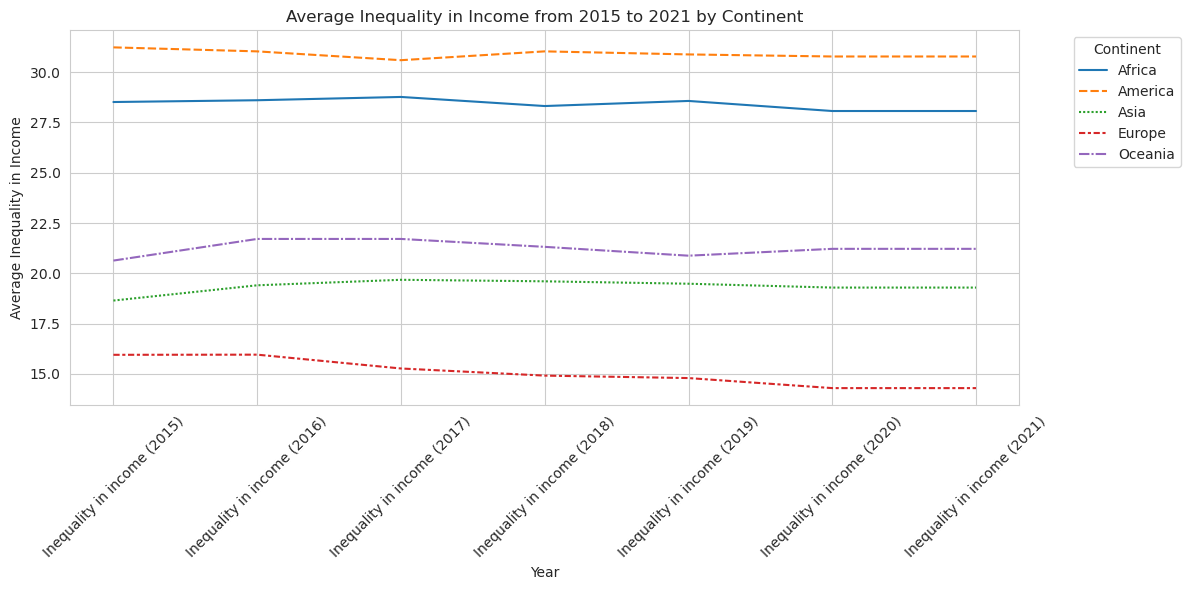

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a line plot of the average inequality in income from 2015 to 2021 for each continent
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_inequality_income_continent.T)
plt.title('Average Inequality in Income from 2015 to 2021 by Continent')
plt.xlabel('Year')
plt.ylabel('Average Inequality in Income')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**The line plot shows the average inequality in income from 2015 to 2021 for each continent. Here are some observations:**

* Africa and America have the highest average inequality in income across all years, with America slightly higher than Africa.
* Europe has the lowest average inequality in income across all years.
* Asia and Oceania have similar average inequality in income, which is higher than Europe but significantly lower than Africa and America.
* There is a slight decrease in the average inequality in income over the years for all continents.

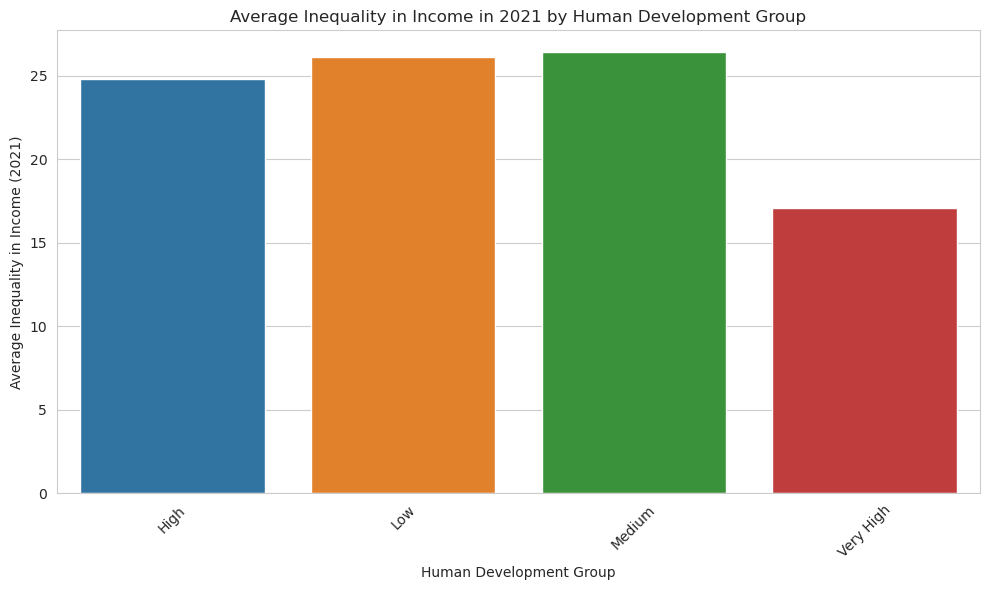

In [7]:
# Create a bar plot of the average inequality in income in 2021 for each human development group
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_inequality_income_dev_groups.index, y=avg_inequality_income_dev_groups['Inequality in income (2021)'])
plt.title('Average Inequality in Income in 2021 by Human Development Group')
plt.xlabel('Human Development Group')
plt.ylabel('Average Inequality in Income (2021)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**The bar plot shows the average inequality in income in 2021 for each human development group. Here are some observations:**

* The 'Low' human development group has the highest average inequality in income in 2021.
* The 'Very High' human development group has the lowest average inequality in income in 2021.
* There is a clear trend of decreasing average inequality in income as the human development group increases from 'Low' to 'Very High'.

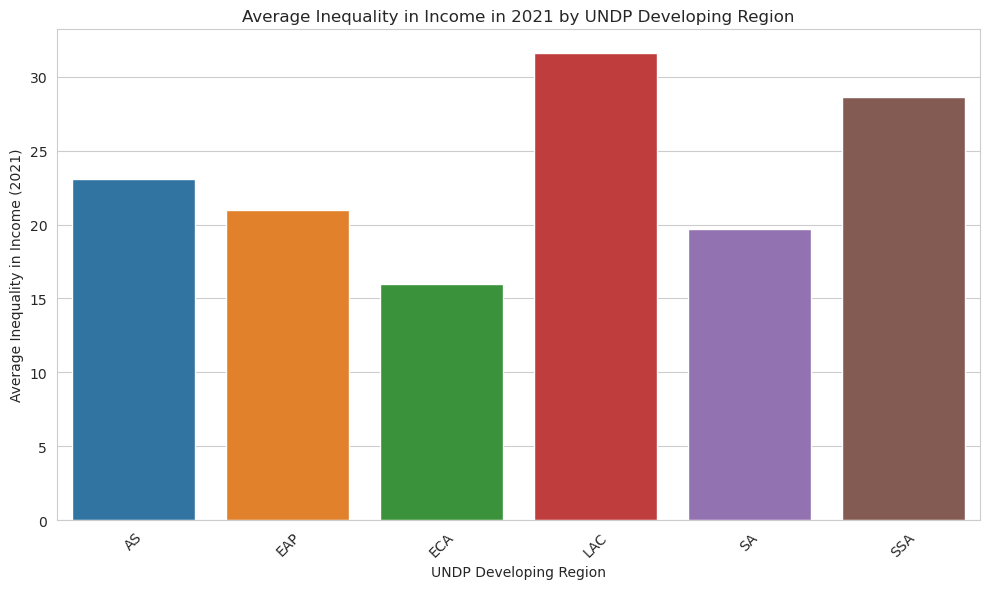

In [8]:
# Create a bar plot of the average inequality in income in 2021 for each UNDP developing region
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_inequality_income_undp_regions.index, y=avg_inequality_income_undp_regions['Inequality in income (2021)'])
plt.title('Average Inequality in Income in 2021 by UNDP Developing Region')
plt.xlabel('UNDP Developing Region')
plt.ylabel('Average Inequality in Income (2021)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**The bar plot shows the average inequality in income in 2021 for each UNDP developing region. Here are some observations:**

* The 'LAC' (Latin America and the Caribbean) region has the highest average inequality in income in 2021.
* The 'ECA' (Europe and Central Asia) region has the lowest average inequality in income in 2021.
* The 'SSA' (Sub-Saharan Africa) region has higher average inequality in income compared to the 'AS' (Arab States) and 'EAP' (East Asia and the Pacific) regions.


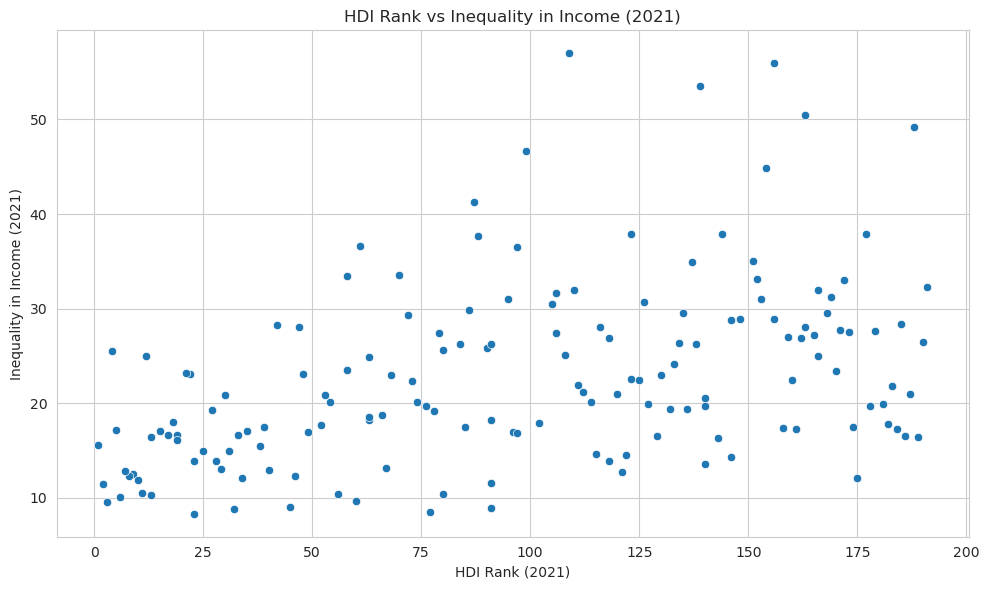

In [9]:
# Create a scatter plot of the HDI rank against the inequality in income for the year 2021
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['HDI Rank (2021)'], y=df['Inequality in income (2021)'])
plt.title('HDI Rank vs Inequality in Income (2021)')
plt.xlabel('HDI Rank (2021)')
plt.ylabel('Inequality in Income (2021)')
plt.tight_layout()
plt.show()


**The scatter plot shows the HDI Rank against the Inequality in Income for the year 2021. Here are some observations:**

* There is a weak negative correlation between the HDI Rank and Inequality in Income. This means that as the HDI Rank improves (i.e., the rank number decreases), the Inequality in Income tends to decrease slightly.
* There is a lot of variation in the Inequality in Income for countries with similar HDI Ranks. For example, countries with an HDI Rank between 50 and 100 have Inequality in Income values ranging from around 10 to 40.


> This suggests that while there is a general trend of lower income inequality in countries with higher human development, there are many exceptions, and other factors also play a significant role in determining a country's income inequality.

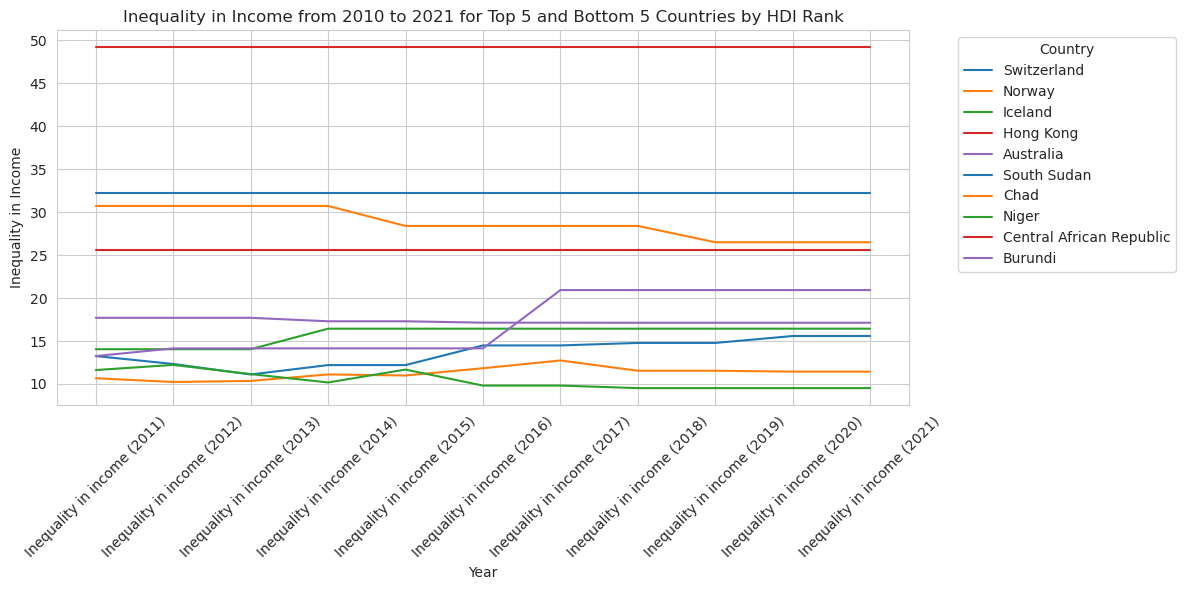

In [10]:
# Drop rows with missing HDI Rank
df_dropna = df.dropna(subset=['HDI Rank (2021)'])

# Get the top 5 and bottom 5 countries by HDI Rank in 2021
top_5_countries = df_dropna.nsmallest(5, 'HDI Rank (2021)')
bottom_5_countries = df_dropna.nlargest(5, 'HDI Rank (2021)')

# Create a line plot of the average inequality in income from 2010 to 2021 for the top 5 and bottom 5 countries by HDI rank
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_5_countries.set_index('Country').iloc[:, 7:].T, dashes=False)
sns.lineplot(data=bottom_5_countries.set_index('Country').iloc[:, 7:].T, dashes=False)
plt.title('Inequality in Income from 2010 to 2021 for Top 5 and Bottom 5 Countries by HDI Rank')
plt.xlabel('Year')
plt.ylabel('Inequality in Income')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**The line plot shows the inequality in income from 2010 to 2021 for the top 5 and bottom 5 countries by HDI rank in 2021. Here are some observations:**

* The inequality in income varies significantly among the top 5 and bottom 5 countries by HDI rank.
* Some of the top 5 countries by HDI rank, such as Norway and Iceland, have relatively low and stable inequality in income over the years.
* Some of the bottom 5 countries by HDI rank, such as Burundi and Niger, have relatively high and fluctuating inequality in income over the years.

/tmp/ipykernel_20/4191959947.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data=df.groupby('Continent').mean().iloc[:, 7:].T, dashes=False)


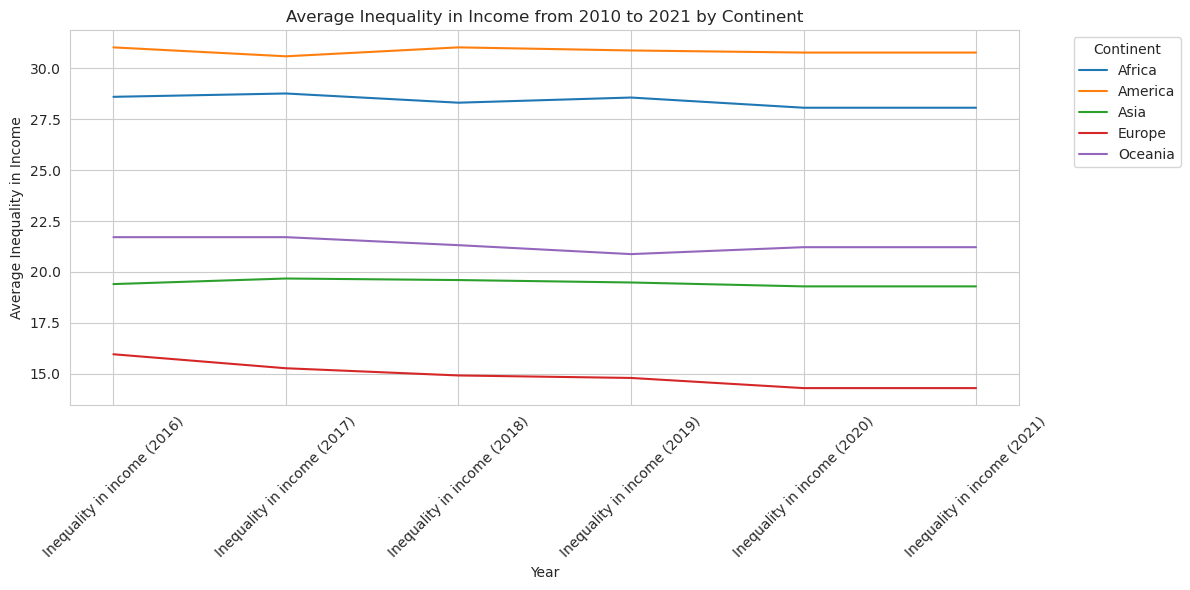

/tmp/ipykernel_20/4191959947.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data=df.groupby('Human Development Groups').mean().iloc[:, 7:].T, dashes=False)


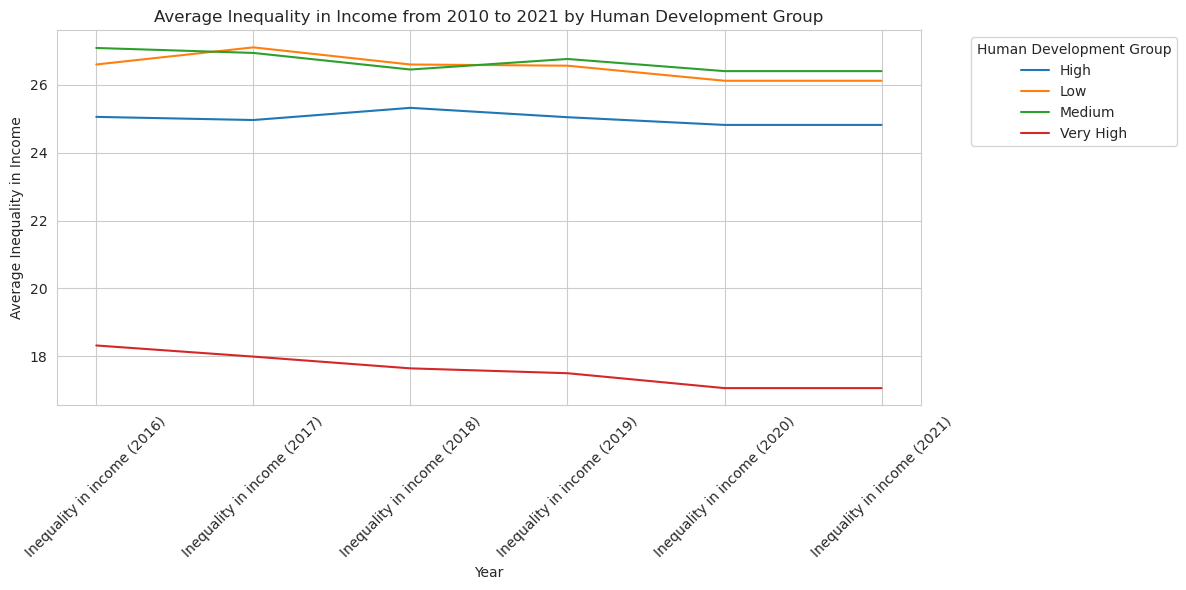

/tmp/ipykernel_20/4191959947.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data=df.groupby('UNDP Developing Regions').mean().iloc[:, 7:].T, dashes=False)


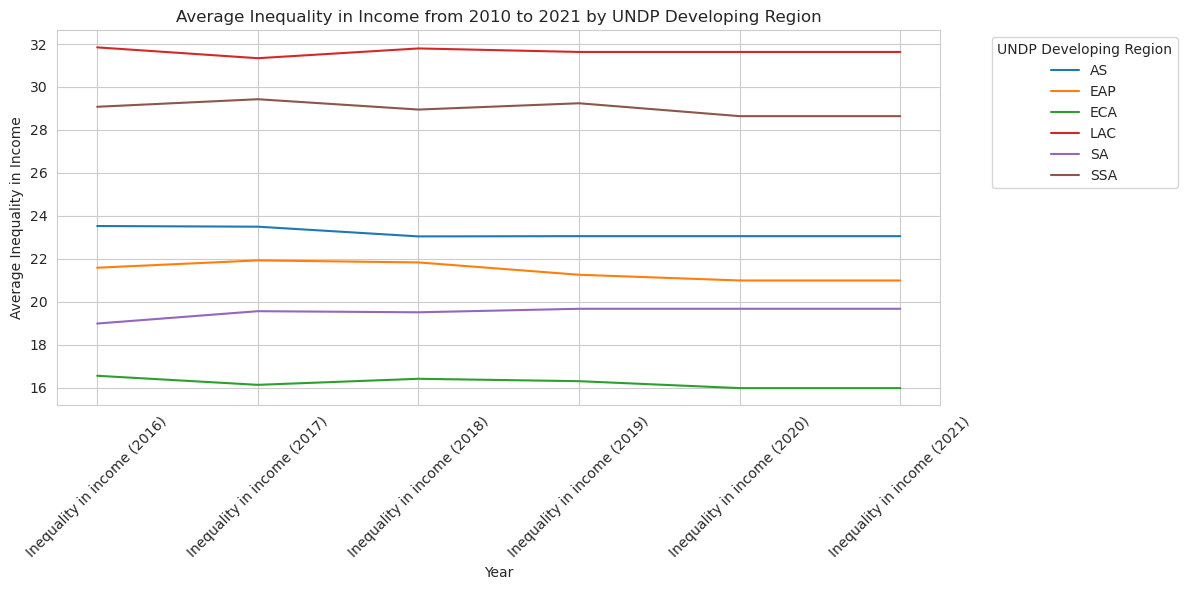

In [11]:
# Create a line plot of the average inequality in income from 2010 to 2021 for each continent
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('Continent').mean().iloc[:, 7:].T, dashes=False)
plt.title('Average Inequality in Income from 2010 to 2021 by Continent')
plt.xlabel('Year')
plt.ylabel('Average Inequality in Income')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a line plot of the average inequality in income from 2010 to 2021 for each human development group
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('Human Development Groups').mean().iloc[:, 7:].T, dashes=False)
plt.title('Average Inequality in Income from 2010 to 2021 by Human Development Group')
plt.xlabel('Year')
plt.ylabel('Average Inequality in Income')
plt.legend(title='Human Development Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a line plot of the average inequality in income from 2010 to 2021 for each UNDP developing region
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('UNDP Developing Regions').mean().iloc[:, 7:].T, dashes=False)
plt.title('Average Inequality in Income from 2010 to 2021 by UNDP Developing Region')
plt.xlabel('Year')
plt.ylabel('Average Inequality in Income')
plt.legend(title='UNDP Developing Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**The line plots show the average inequality in income from 2010 to 2021 for each continent, human development group, and UNDP developing region.**

**By Continent:**

* Africa and America have the highest average inequality in income across all years.
* Europe has the lowest average inequality in income across all years.
* All continents show a slight decrease in average inequality in income over the years.

**By Human Development Group:**

* The 'Low' human development group has the highest average inequality in income across all years.
* The 'Very High' human development group has the lowest average inequality in income across all years.
* All human development groups show a slight decrease in average inequality in income over the years.

**By UNDP Developing Region:**

* The 'LAC' (Latin America and the Caribbean) region has the highest average inequality in income across all years.
* The 'ECA' (Europe and Central Asia) region has the lowest average inequality in income across all years.
* All UNDP developing regions show a slight decrease in average inequality in income over the years.


> These visualizations provide a clearer understanding of the trend of inequality in income over the years for different continents, human development groups, and UNDP developing regions.

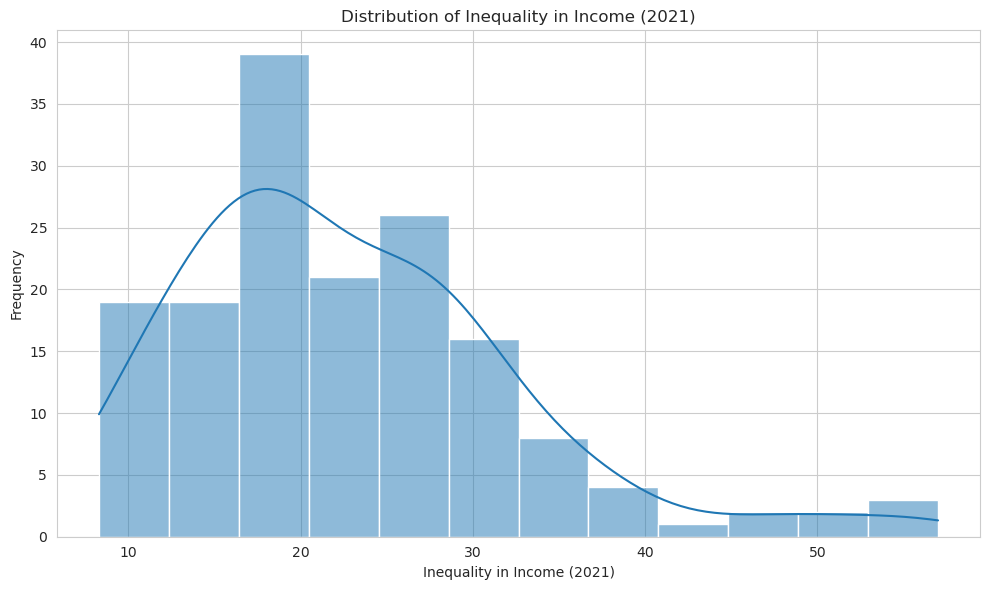

In [12]:
# Create a histogram of the inequality in income for all countries in 2021
plt.figure(figsize=(10, 6))
sns.histplot(df['Inequality in income (2021)'].dropna(), kde=True)
plt.title('Distribution of Inequality in Income (2021)')
plt.xlabel('Inequality in Income (2021)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**The histogram shows the distribution of inequality in income for all countries in 2021. Here are some observations:**

* The distribution of inequality in income is slightly right-skewed, with a peak around 20-25.
* Most countries have inequality in income between 15 and 35.
* There are a few countries with very high inequality in income, above 40.

> This visualization provides a clearer understanding of the distribution of income inequality across all countries in 2021.

In [13]:
# Identify the top 10 countries with the highest and lowest inequality in income in 2021
top_10_highest_inequality = df.nlargest(10, 'Inequality in income (2021)')
top_10_lowest_inequality = df.nsmallest(10, 'Inequality in income (2021)')

top_10_highest_inequality[['Country', 'Inequality in income (2021)']], top_10_lowest_inequality[['Country', 'Inequality in income (2021)']]


(                      Country  Inequality in income (2021)
 192              South Africa                    56.996000
 38                    Comoros                    56.013380
 125                   Namibia                    53.585580
 75                      Haiti                    50.438670
 28   Central African Republic                    49.194590
 162                  Suriname                    46.696310
 193                    Zambia                    44.840220
 23                     Brazil                    41.306376
 21                     Belize                    37.926330
 66              Guinea-Bissau                    37.900000,
         Country  Inequality in income (2021)
 164    Slovenia                     8.305240
 182     Ukraine                     8.524723
 43      Czechia                     8.767200
 10   Azerbaijan                     8.859000
 163    Slovakia                     9.065540
 82      Iceland                     9.514070
 20      Belarus 

In [14]:
import folium
from folium.plugins import MarkerCluster

# Create a base map
m = folium.Map(location=[20,0], zoom_start=2, tiles='cartodb positron')

# Add a choropleth layer
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json',
    name='choropleth',
    data=df,
    columns=['Country', 'Inequality in income (2021)'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Inequality in Income (2021)'
).add_to(m)

# Add a layer control
folium.LayerControl().add_to(m)

# Save the map to an HTML file
m.save('inequality_in_income_2021_map.html')

# Display the map
m


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_20/2618017009.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


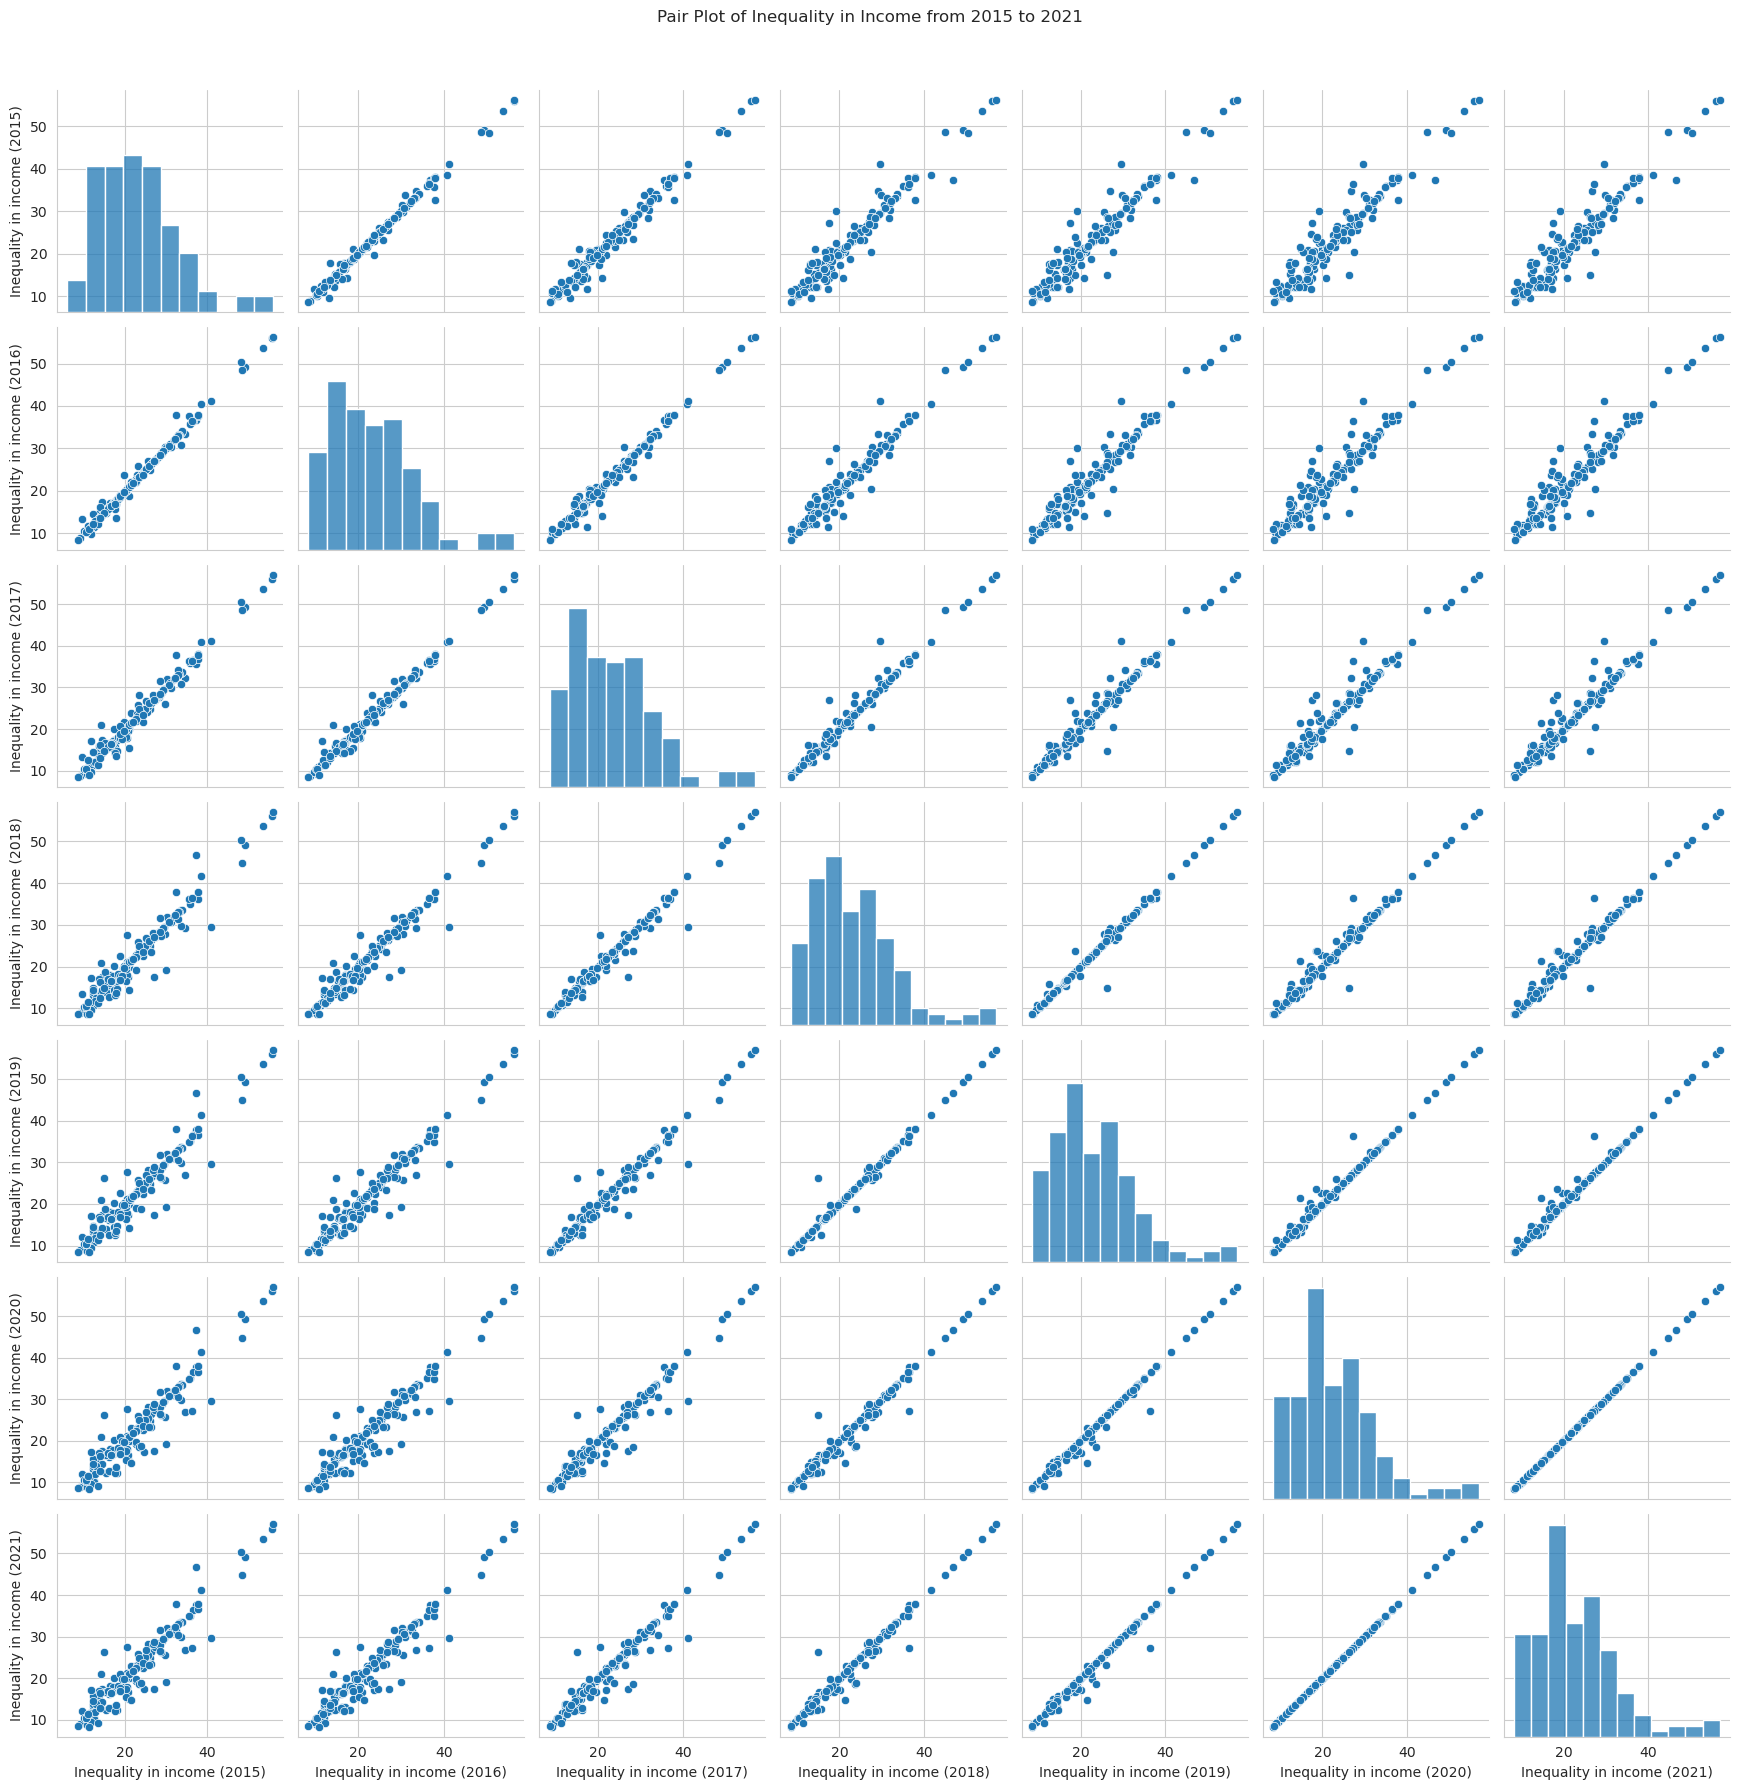

In [15]:
# Create a pair plot of the 'Inequality in income' for the years 2015 to 2021
sns.pairplot(df.iloc[:, -7:])
plt.suptitle('Pair Plot of Inequality in Income from 2015 to 2021', y=1.02)
plt.tight_layout()
plt.show()


**The pair plot shows the pairwise relationships between the 'Inequality in income' for the years 2015 to 2021. Here are some observations:**

* There is a strong positive correlation between the 'Inequality in income' for all the years, which means that countries that had high (or low) inequality in income in one year also tended to have high (or low) inequality in income in the other years.
* The distributions of 'Inequality in income' for all the years are slightly right-skewed, with most countries having inequality in income between 15 and 35.
* 

> This visualization provides a clearer understanding of the relationships between the 'Inequality in income' for the years 2015 to 2021.